# TP à rendre : Application pratique de la SVD
---

- Master 1 : MLSD-FI-FA
- Année académique 2025/2026
- Enseignant : Lazhar Labiod
- Adresse :
    - Centre Borelli – Université de Paris Cité
- Mail : lazhar.labiod@u-paris.fr
---
- Remise du projet :
---

**⚠️ Consignes de dépôt :**
- **Date limite** : **Mercredi 15 octobre à 17h30** (sur Moodle).
- **Groupe** : **3 étudiants maximum**.
- **À fournir** : **Notebook + liste des noms/prénoms** des membres du groupe.

---
membres_du_groupe = ["Jinyu Cong", "Furkan Narin"]

---

## Partie1: Décomposition  Matricielle - Réorganisation et visualisation d'une matrice 
---

### svd - méthode des puissances itérées (Power method)
---
Ce code présente une implémentation de la méthode svd en utilisant la méthode des puissances itérées.

In [ ]:
import numpy as np
from numpy.linalg import norm

from random import normalvariate
from math import sqrt

def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]


def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''

    n, m = A.shape
    x = randomUnitVector(min(n,m))
    lastV = None
    currentV = x

    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iterations = 0
    while True:
        iterations += 1
        lastV = currentV
        currentV = np.dot(B, lastV)
        currentV = currentV / norm(currentV)

        if abs(np.dot(currentV, lastV)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return currentV


def svd(A, k=None, epsilon=1e-10):
    '''
        Compute the singular value decomposition of a matrix A
        using the power method. A is the input matrix, and k
        is the number of singular values you wish to compute.
        If k is None, this computes the full-rank decomposition.
    '''
    A = np.array(A, dtype=float)
    n, m = A.shape
    svdSoFar = []
    if k is None:
        k = min(n, m)

    for i in range(k):
        matrixFor1D = A.copy()

        for singularValue, u, v in svdSoFar[:i]:
            matrixFor1D -= singularValue * np.outer(u, v)

        if n > m:
            v = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svdSoFar.append((sigma, u, v))

    singularValues, us, vs = [np.array(x) for x in zip(*svdSoFar)]
    return singularValues, us.T, vs


if __name__ == "__main__":
    movieRatings = np.array([
        [2, 5, 3],
        [1, 2, 1],
        [4, 1, 1],
        [3, 5, 2],
        [5, 3, 1],
        [4, 5, 5],
        [2, 4, 2],
        [2, 2, 5],
    ], dtype='float64')

    # v1 = svd_1d(movieRatings)
    # print(v1)

    theSVD = svd(movieRatings)


### Questions :
---

Q1 : Créer une dataframe à partir de X en considérant le noms des lignes et colonnes?

- la matrice X donne une description de 16 villes américaines (les colonnes) décrites par 9 caractéristiques (les lignes), chaque cellule de X indique la présence 1 ou l'absence 0 d'une carctéristique dans une ville.

In [3]:
X = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]


In [4]:
import pandas as pd
import numpy as np

df=pd.DataFrame(X, columns=columns, index=index)
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
HighSchool,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
AgricultCoop,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
Railstation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
OneRoomSchool,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
Veterinary,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
NoDoctor,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
NoWaterSupply,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
PoliceStation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
LandReallocation,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0


Q2 : Appliquer les  méthodes svd et  la fonction linalg.svd sur la matrice X ?

In [176]:
my_s, my_u, my_v = svd(X)
lin_u, lin_s, lin_v = np.linalg.svd(X)

print(my_s)
print("****************")
print(lin_s)

print(my_s.shape, my_u.shape, my_v.shape)

converged in 530 iterations!
converged in 14 iterations!
converged in 9 iterations!
converged in 2 iterations!
converged in 15 iterations!
converged in 2 iterations!
converged in 2 iterations!
converged in 2 iterations!
converged in 2 iterations!
[4.27155838 4.24264072 2.44948974 1.32430689 4.24263976 4.24263976
 4.24263976 4.24263976 4.24263976]
****************
[4.27155841e+00 4.24264069e+00 2.44948974e+00 1.32430689e+00
 8.80311986e-16 3.08179053e-16 1.18534084e-16 2.35403834e-31
 1.12914907e-32]
(9,) (9, 9) (9, 16)


Q3 : Comparer les résltas obtenus en terme de l'erruer de reconstruction?

In [45]:
# s_k, u_k, v_k = svd(df)
ori_U, ori_S, ori_V = np.linalg.svd(df, full_matrices=False)
# lin_u_k, lin_s_k, lin_v_k = lin_u[:, :k], lin_s[:k], lin_v[:k, :]
original_size = ori_U.size + ori_S.size + ori_V.size


k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
errors = {}

for k in k_values:
    U, S, Vt = np.linalg.svd(df, full_matrices=False)
    U_k, S_k, V_k = U[:, :k], S[:k], Vt[:k, :]
    
    X_recon = U_k @ np.diag(S_k) @ V_k 
    
    mse = np.mean((X - X_recon)**2)
    mae = np.mean(np.abs(X - X_recon))
    
    compressed_size = U_k.size + S_k.size + V_k.size
    compressed_ratio = compressed_size / original_size
    
    errors[k] = {
        "mse": mse,
        "mae": mae,
        "compressed_ratio": compressed_ratio
    }
    
    
df_error = pd.DataFrame(errors)
df_error

# print(u_k.shape, s_k.shape, v_k.shape)
# X_reconstructed = u_k @ np.diag(s_k) @ v_k
# print(X_reconstructed)

# print(X)

,1,2,3,4,5,6,7,8,9
mse,0.178846,0.053846,0.012179,1.132457e-30,1.137856e-30,1.138492e-30,1.138518e-30,1.138518e-30,1.138518e-30
mae,0.204135,0.079135,0.037469,4.561895e-16,4.605896e-16,4.640623e-16,4.639954e-16,4.639954e-16,4.639954e-16
compressed_ratio,0.111111,0.222222,0.333333,4.444444e-01,5.555556e-01,6.666667e-01,7.777778e-01,8.888889e-01,1.000000e+00


Q4 : Vérifier le theorème de Ecart- Young?

k=1: Theoretical=5.074819, Actual=5.074819, Difference=0.00e+00
k=2: Theoretical=2.784563, Actual=2.784563, Difference=4.44e-16
k=3: Theoretical=1.324307, Actual=1.324307, Difference=0.00e+00
k=4: Theoretical=0.000000, Actual=0.000000, Difference=1.18e-14
k=5: Theoretical=0.000000, Actual=0.000000, Difference=1.25e-14
k=6: Theoretical=0.000000, Actual=0.000000, Difference=1.27e-14
k=7: Theoretical=0.000000, Actual=0.000000, Difference=1.28e-14
k=8: Theoretical=0.000000, Actual=0.000000, Difference=1.28e-14
k=9: Theoretical=0.000000, Actual=0.000000, Difference=1.28e-14


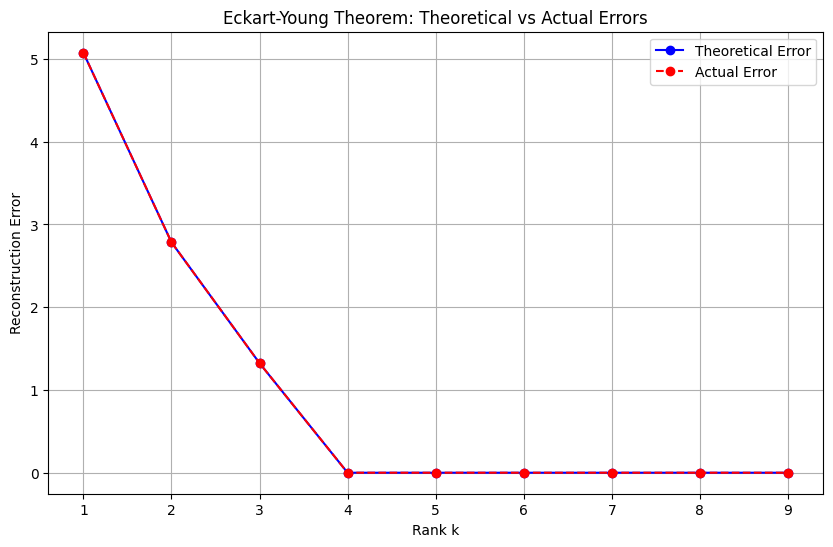

In [46]:
import matplotlib.pyplot as plt


U, S, Vt = np.linalg.svd(X, full_matrices=False)

theoretical_errors = []
actual_errors = []

for k in k_values:
    theoretical_error = np.sqrt(np.sum(S[k:]**2))
    
    X_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    actual_error = np.linalg.norm(X - X_k, 'fro')
    
    theoretical_errors.append(theoretical_error)
    actual_errors.append(actual_error)
    
    print(f"k={k}: Theoretical={theoretical_error:.6f}, Actual={actual_error:.6f}, "
          f"Difference={abs(theoretical_error-actual_error):.2e}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, theoretical_errors, 'bo-', label='Theoretical Error')
plt.plot(k_values, actual_errors, 'ro--', label='Actual Error')
plt.xlabel('Rank k')
plt.ylabel('Reconstruction Error')
plt.title('Eckart-Young Theorem: Theoretical vs Actual Errors')
plt.legend()
plt.grid(True)
plt.show()


Q5: Calculer les valeurs et vecteurs propores des matrice X*X^T et X^TX, comparer avec les rvecteurs singuliers et valeurs singulières de X.

In [62]:
n, m = X.shape

XTX = X.T @ X
XXT = X @ X.T

# print(XTX.shape, XXT.shape)

eigenvals_XTX, eigenvecs_XTX = np.linalg.eig(XTX)
idx_XTX = np.argsort(eigenvals_XTX)[::-1]
eigenvals_XTX = eigenvals_XTX[idx_XTX]
eigenvecs_XTX = eigenvecs_XTX[:, idx_XTX]

eigenvals_XXT, eigenvecs_XXT = np.linalg.eig(XXT)
idx_XXT = np.argsort(eigenvals_XXT)[::-1]
eigenvals_XXT = eigenvals_XXT[idx_XXT]
eigenvecs_XXT = eigenvecs_XXT[:, idx_XXT]


print(f"X^T X valeurs propres: {eigenvals_XTX[:5]}")
print(f"X X^T valeurs propres: {eigenvals_XXT[:5]}")

U, S, Vt = np.linalg.svd(X, full_matrices=False)
print(f"Valeurs singuliers: {S[:5]}")

# Vérifie que eigenvalues = valeur singulier ** 2
for i in range(5):
    print(f"Valeur singulier: {S[i]**2:.8f}, eigenvalues de XTX: {eigenvals_XTX[i]:.8f}, ")
    print(f"match: {np.isclose(S[i]**2, eigenvals_XTX[i], eigenvals_XXT[i])}")


X^T X valeurs propres: [1.82462113e+01+0.j 1.80000000e+01+0.j 6.00000000e+00+0.j
 1.75378875e+00+0.j 5.60403767e-16+0.j]
X X^T valeurs propres: [18.24621125 18.          6.          1.75378875  0.        ]
Valeurs singuliers: [4.27155841e+00 4.24264069e+00 2.44948974e+00 1.32430689e+00
 8.80311986e-16]
Valeur singulier: 18.24621125, eigenvalues de XTX: 18.24621125+0.00000000j, 
match: True
Valeur singulier: 18.00000000, eigenvalues de XTX: 18.00000000+0.00000000j, 
match: True
Valeur singulier: 6.00000000, eigenvalues de XTX: 6.00000000+0.00000000j, 
match: True
Valeur singulier: 1.75378875, eigenvalues de XTX: 1.75378875+0.00000000j, 
match: True
Valeur singulier: 0.00000000, eigenvalues de XTX: 0.00000000+0.00000000j, 
match: True


Q6 : En s'appuyant sur l'algorithme donner dans le papier,implémenter l'agorithme présenté dans le papier en  adaptant le code de la fonction svd_1d.

In [63]:
def randomUnitVector(n):
    """Générer un vecteur unitaire aléatoire"""
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

def svd_1d_adapted(A, epsilon=1e-10, max_iterations=1000):
    """
    Algorithme SVD 1D adapté du papier
    Version améliorée avec contrôle de convergence
    """
    n, m = A.shape
    
    # Initialisation avec vecteur aléatoire unitaire
    if n > m:
        x = randomUnitVector(m)  # Pour les vecteurs de droite
        B = np.dot(A.T, A)       # Matrice de covariance des colonnes
    else:
        x = randomUnitVector(n)  # Pour les vecteurs de gauche  
        B = np.dot(A, A.T)       # Matrice de covariance des lignes
    
    lastV = None
    currentV = x
    iterations = 0
    
    # Algorithme de puissance itéré
    while iterations < max_iterations:
        iterations += 1
        lastV = currentV
        
        # Multiplication matrice-vecteur
        currentV = np.dot(B, lastV)
        
        # Normalisation
        currentV_norm = norm(currentV)
        if currentV_norm < epsilon:
            break
        currentV = currentV / currentV_norm
        
        # Critère de convergence
        dot_product = abs(np.dot(currentV, lastV))
        if dot_product > 1 - epsilon:
            print(f"Convergence atteinte en {iterations} itérations")
            break
    
    if iterations == max_iterations:
        print(f"Maximum d'itérations atteint: {max_iterations}")
    
    return currentV

def svd_algorithm_paper(X, k=None, epsilon=1e-10):
    """
    Algorithme SVD complet basé sur le papier
    Calcule les k premières composantes singulières
    """
    A = X.copy().astype(float)
    n, m = A.shape
    
    if k is None:
        k = min(n, m)
    
    U_list = []
    V_list = []
    S_list = []
    
    print(f"Début de la décomposition SVD pour {k} composantes")
    print(f"Matrice de taille: {n} x {m}")
    
    for i in range(k):
        print(f"\n--- Calcul de la composante {i+1} ---")
        
        # Calcul du premier vecteur singulier
        if n > m:
            # Priorité aux vecteurs de droite (plus petits)
            v = svd_1d_adapted(A, epsilon=epsilon)
            
            # Calcul du vecteur de gauche correspondant
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)
            
            if sigma > epsilon:
                u = u_unnormalized / sigma
            else:
                u = u_unnormalized
        else:
            # Priorité aux vecteurs de gauche (plus petits)
            u = svd_1d_adapted(A, epsilon=epsilon)
            
            # Calcul du vecteur de droite correspondant
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)
            
            if sigma > epsilon:
                v = v_unnormalized / sigma
            else:
                v = v_unnormalized
        
        print(f"Valeur singulière σ_{i+1} = {sigma:.6f}")
        
        # Stockage des résultats
        U_list.append(u)
        V_list.append(v)
        S_list.append(sigma)
        
        # Déflation: soustraction de la composante courante
        if sigma > epsilon:
            A_deflation = sigma * np.outer(u, v)
            A_prev = A.copy()
            A -= A_deflation
            
            # Vérification de la déflation
            deflation_error = norm(A_prev - A - A_deflation)
            if deflation_error > epsilon:
                print(f"Attention: erreur de déflation = {deflation_error:.2e}")
        
        # Arrêt prématuré si valeur singulière trop petite
        if sigma < epsilon:
            print(f"Valeur singulière négligeable, arrêt à l'itération {i+1}")
            break
    
    # Construction des matrices de sortie
    U = np.column_stack(U_list) if U_list else np.array([]).reshape(n, 0)
    V = np.column_stack(V_list) if V_list else np.array([]).reshape(m, 0)
    S = np.array(S_list)
    
    print(f"\nDécomposition SVD terminée")
    print(f"U: {U.shape}, S: {S.shape}, V: {V.shape}")
    
    return U, S, V

converged in 336 iterations!


array([ 8.26331869e-163, -5.89088519e-004,  8.26331869e-163,
       -6.57191958e-001, -5.89088519e-004, -6.57191958e-001,
       -3.69047992e-001,  8.26331869e-163, -5.89088519e-004])

- L'objectif de cette partie est d'appliquer  l'adaptation de la fonction svd_1d sur une matrice X afin de mieux  réorganiser ses lignes et ses colonnes. Cette méthode nous permet de réordonner à la fois les lignes et les colonnes afin de visualiser les éléments de façon plus groupée.

- Le principe de la l'daptation de la méthode svd_1d est d'approximer  de manière itérative les vecteurs singuliers associés à la plus grande valeur singulère de la matrice de la matrice X. 

-  En effet, afin de pouvoir réordonner les lignes et les colonnes de X pour avoir une strcture par blocs, il faut d'abord trier les vecteurs u et v, ensuite réorganisé les lignes en fonction du tri de u  et les colonnes de X du tri de v.

Q7 : Visualiser la matrice X (utiliser la fonction  imshow de matplotlib), 

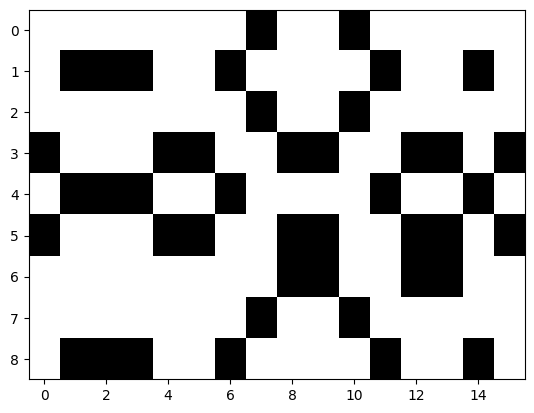

In [68]:
plt.imshow(X, cmap='binary', aspect='auto')

![data_X.png](attachment:369d82d1-2e6d-46f3-954c-223caa4700ec.png)

Q8: Ecrire la fonction Reordonner (aide : utiliser argsort() de numpy)
- qui prend en paramètres X,et ses vecteurs singuliers u et v obtenus à partir 
de svd_1d(X, epsilon=1e-10)
- et qui renvoie la matrice X réordonnée selon le tri de u et v

In [121]:
##%%script false --no-raise-error
def reordonner(X, u, v):
    """
        renvoie les lignes et les colonnes de X réorganisées par rapport au tri des vecteurs u et v
        utiliser argsort() pour trier les vecteurs u et v
    """
    row_indices = np.argsort(u)
    col_indices = np.argsort(v)

    X_reordonnee = X[row_indices, :]
    X_reordonnee = X_reordonnee[:, col_indices]
    return X_reordonnee

Q9:

- Claculer les deux premiers vecteurs singuliers de X u et v - (appeler la fonction R1svd)
- Réordonner X en fonction des tri de u et v- (appler la fonction Reordonner)
- Visualiser X réordnnée (avec imshow) pour avoir une matrice réorganiser par blocs
---
- Résultat attendu

![data_X_reordred.png](attachment:75544f72-9dc4-44aa-b5a9-fa2aad4952a9.png)

converged in 354 iterations!
converged in 10 iterations!
(9, 16)


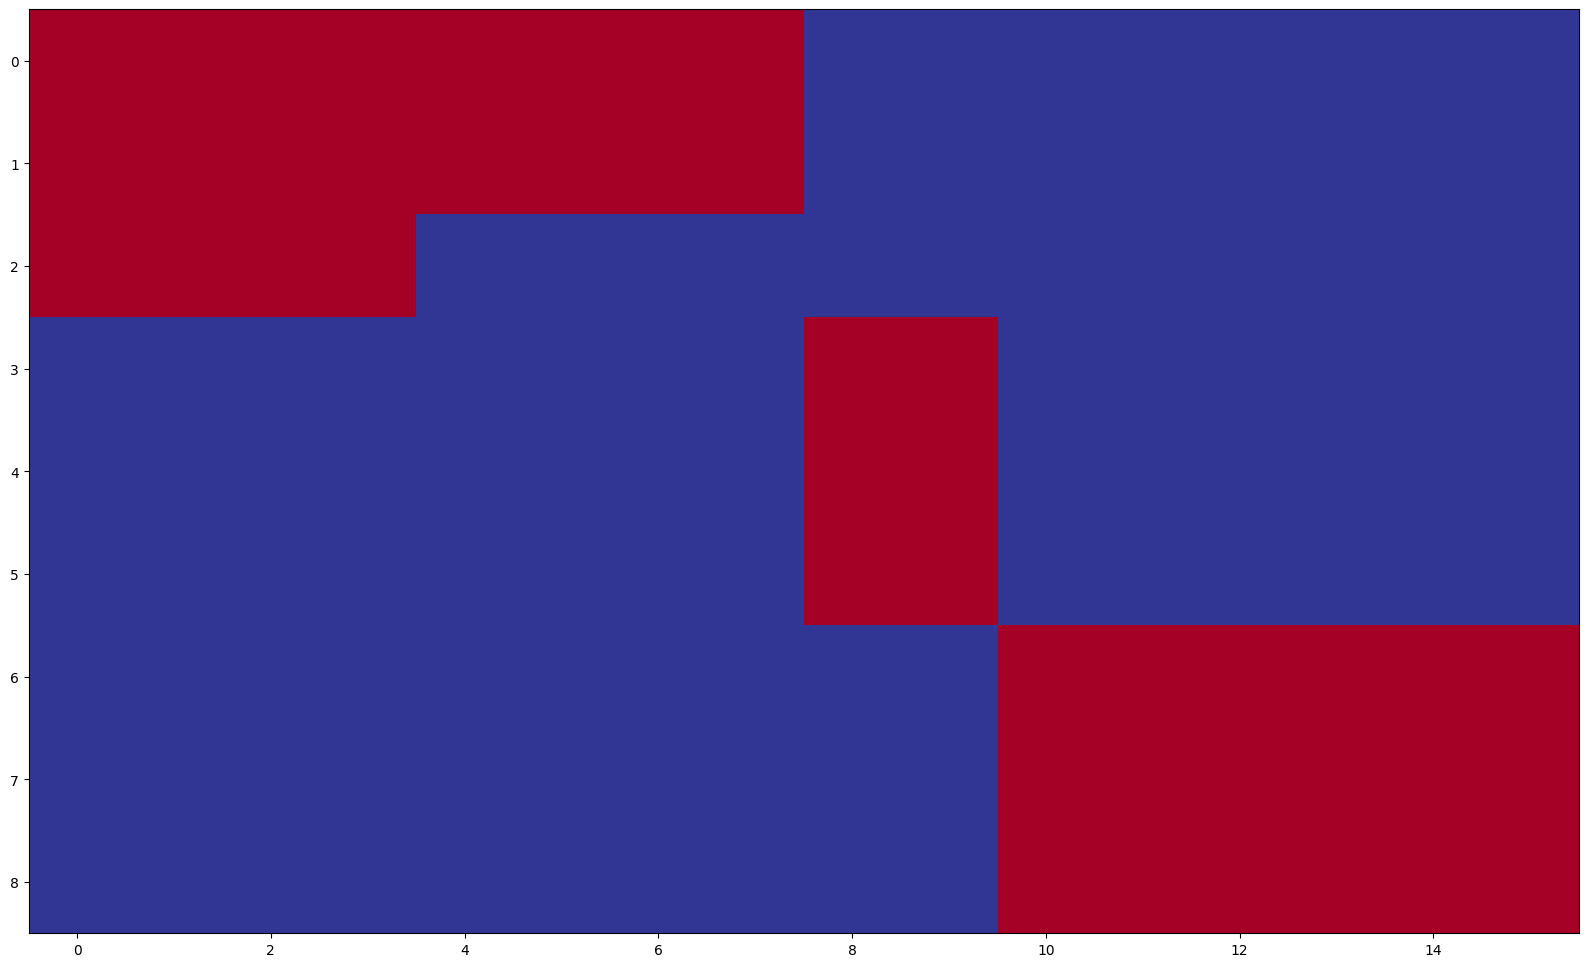

In [122]:
s, u, v = svd(X, k=2)
u1, u2 = u[:, 0], u[:, 1]
v1, v2 = v[0, :], v[1, :]
X_reordonnee = reordonner(X, u1, v1)

fig = plt.figure(figsize=(20, 12))

ax1 = plt.plot(2, 3, 1)
im1 = plt.imshow(X_reordonnee, cmap='RdYlBu_r', aspect='auto')

Q10:

- Calculer la matrice  de similarité entre les lignes de X, $SR=XX^T$, ($X^T$ est matrice transposée de X).
- Calculer la matrice de similarité entre les colonnes de X, $SC=X^TX$
- Construire la matrice
$
M= \begin{pmatrix}
SR & X\\
X^T & SC
\end{pmatrix} 
$ 
- Visualiser M reordonnée en fonction des tris de u et v.
---
- Résultat attendu
  
![data_M_reordonnee.png](attachment:1ee58872-e915-4421-ae2c-640dc72a534f.png)


(9, 9) (16, 16)
(25, 25)
converged in 500 iterations!
converged in 9 iterations!


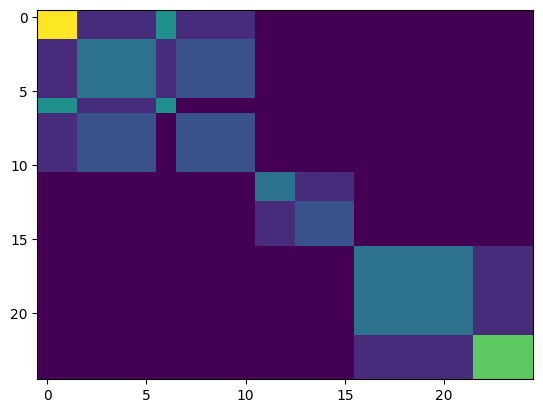

In [180]:
SR = X @ X.T
SC = X.T @ X

print(SR.shape, SC.shape)

n, m = X.shape
M = np.zeros((n + m, n + m))
M[0:n, 0:n] = SR
M[0:n, n:n+m] = X
M[n:n+m, 0:n] = X.T
M[n:n+m, n:n+m] = SC

print(M.shape)

S, U, V = svd(X, k=2)
u = U[:, 0]
v = V[0, :]

row_order = np.argsort(np.concatenate([u, v]))
M_reordered = M[row_order, :][:, row_order]

plt.imshow(M_reordered, cmap='viridis', aspect='auto')

##### Q11: Tracer (visulaiser) le deux vecteurs u et v triés? qu'en conluez vous?

converged in 354 iterations!
converged in 12 iterations!


<BarContainer object of 16 artists>

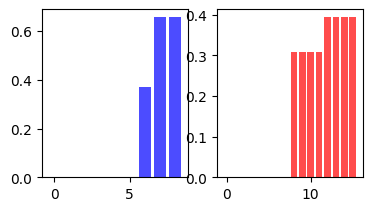

In [175]:
S, U, V = svd(X, k=2)
u = U[:, 0]
v = V[0, :]

u_sorted_indices = np.argsort(u)
v_sorted_indices = np.argsort(v)

u_sorted = u[u_sorted_indices]
v_sorted = v[v_sorted_indices]

plt.subplot(2, 3, 1)
plt.bar(range(len(u_sorted)), u_sorted, color='blue', alpha=0.7)

plt.subplot(2, 3, 2)
plt.bar(range(len(v_sorted)), v_sorted, color='red', alpha=0.7)

## Conclusion

Les vecteurs u et v triés montrent des "paliers" clairs, indiquant des groupes naturels de lignes et colonnes similaires.

La présence de ces paliers explique pourquoi la matrice réordonnée présente une structure en blocs - les éléments similaires sont regroupés ensemble.

u révèle environ 3 groupes de lignes
v révèle environ 8 groupes de colonnes

Les valeurs des vecteurs singuliers représentent le "degré d'appartenance" à la composante principale, avec les valeurs extrêmes indiquant les éléments les plus caractéristiques.

Le tri par argsort() place naturellement les éléments similaires côte à côte, créant les blocs homogènes observés dans la visualisation.

Les vecteurs u et v triés confirment que la SVD capture efficacement la structure latente de la matrice, permettant un regroupement optimal des lignes et colonnes similaires.